In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import metrics


In [ ]:
def loadPrices(fn):
    global nt, nInst
    df=pd.read_csv(fn, sep='\s+', header=None, index_col=None)
    nt, nInst = df.values.shape
    return (df.values)

pricesFile="./prices.txt"
prcAll = loadPrices(pricesFile)
print ("Loaded %d instruments for %d days" % (nInst, nt))

In [9]:
prcAll = pd.DataFrame(prcAll)

In [11]:
lowers, uppers = metrics.calcBollinger(prcAll.iloc[:14], 14, 1)

In [14]:
lowers.iloc[-1] > prcAll.iloc[13]

0     False
1     False
2     False
3     False
4     False
      ...  
95     True
96    False
97     True
98    False
99    False
Name: 13, Length: 100, dtype: bool

In [4]:
prcAll.shape

(250, 100)

In [8]:
prcAll = pd.DataFrame(prcAll)

In [13]:
means = prcAll.rolling(5).mean()
stds = prcAll.rolling(5).std()

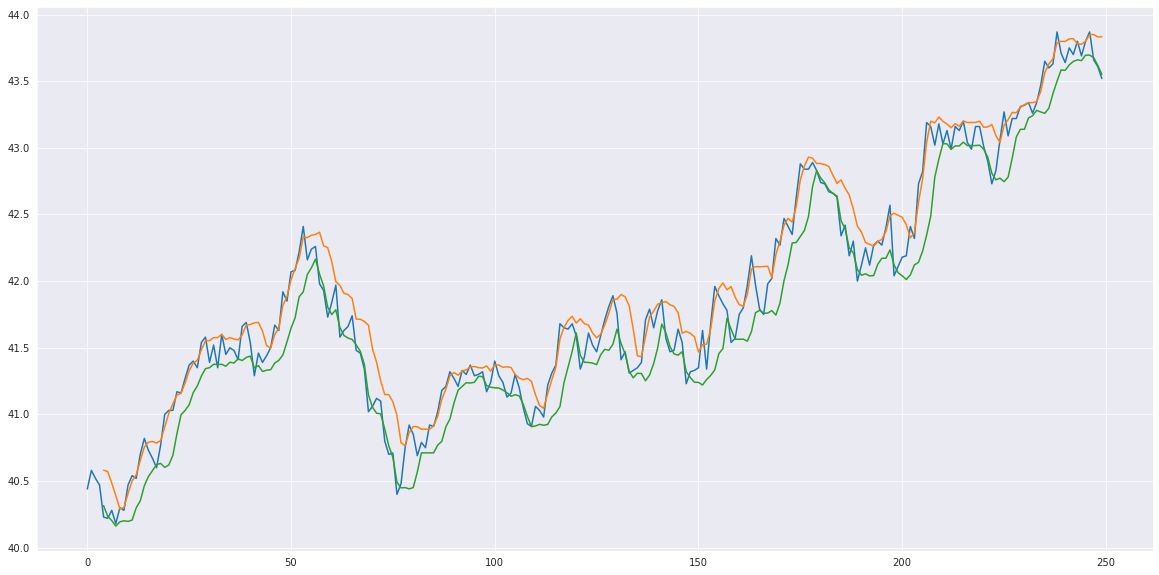

In [20]:
plt.figure(figsize=(20,10))
plt.plot(prcAll[0])
plt.plot(means[0] + stds[0])
plt.plot(means[0] - stds[0])

In [22]:
prcAll[0].rolling(5)

Rolling [window=5,center=False,axis=0,method=single]

In [23]:
inst0 = prcAll[0]

In [25]:
diff0 = np.diff(inst0)

In [29]:
np.maximum(0, diff0)

array([0.14, 0.  , 0.  , 0.  , 0.  , 0.06, 0.  , 0.12, 0.  , 0.19, 0.07,
       0.  , 0.18, 0.12, 0.  , 0.  , 0.  , 0.17, 0.23, 0.03, 0.  , 0.14,
       0.  , 0.11, 0.1 , 0.03, 0.  , 0.19, 0.04, 0.  , 0.13, 0.  , 0.25,
       0.  , 0.05, 0.  , 0.  , 0.25, 0.03, 0.  , 0.  , 0.17, 0.  , 0.05,
       0.06, 0.17, 0.  , 0.29, 0.  , 0.22, 0.01, 0.14, 0.19, 0.  , 0.08,
       0.02, 0.  , 0.  , 0.  , 0.11, 0.13, 0.  , 0.05, 0.03, 0.08, 0.  ,
       0.  , 0.  , 0.  , 0.04, 0.06, 0.  , 0.  , 0.  , 0.01, 0.  , 0.08,
       0.27, 0.17, 0.  , 0.  , 0.1 , 0.  , 0.17, 0.  , 0.11, 0.16, 0.03,
       0.11, 0.  , 0.  , 0.12, 0.  , 0.07, 0.  , 0.01, 0.02, 0.  , 0.07,
       0.16, 0.  , 0.  , 0.  , 0.03, 0.14, 0.  , 0.  , 0.  , 0.  , 0.15,
       0.  , 0.  , 0.24, 0.09, 0.06, 0.31, 0.  , 0.  , 0.04, 0.  , 0.  ,
       0.09, 0.18, 0.  , 0.  , 0.12, 0.12, 0.1 , 0.08, 0.  , 0.  , 0.06,
       0.  , 0.02, 0.02, 0.04, 0.32, 0.08, 0.  , 0.13, 0.08, 0.  , 0.  ,
       0.01, 0.16, 0.  , 0.  , 0.09, 0.01, 0.02, 0.